In [1]:
from ContinualEvolvingSNN import *
import arff
import warnings
from scipy.io import loadmat
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')

## Load Data and Convert to Spikes

In [2]:
train_path = '../datasets/yeast/yeast-train.arff'
test_path = '../datasets/yeast/yeast-test.arff'
num_features = 103
train_data = arff.load(open(train_path, 'rt'))
train_data = np.array(train_data['data']).astype(np.float32)
test_data = arff.load(open(test_path, 'rt'))
test_data = np.array(test_data['data']).astype(np.float32)
a = train_data[:, :num_features].max(axis=0)
b = train_data[:, :num_features].min(axis=0)

train_spikes, train_labels = encode_data_to_spikes(train_data, device, num_features, a, b)
test_spikes, test_labels = encode_data_to_spikes(test_data, device, num_features, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", np.array(test_labels).shape)

100%|██████████| 917/917 [00:00<00:00, 8645.06it/s]

Train data shape:  (1500, 1, 618)
Train labels shape:  (1500, 14)
Test data shape:  (917, 1, 618)
Test labels shape:  (917, 14)


## DSLL Training and Evaluation Mode

Training and Evaluating on task 1
Train data shape is  (1500, 1, 618)
Train Labels shape is  (1500, 7)
Classes trained are: 0 to 7


  0%|          | 0/100 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 1
Class 1, class 1 neurons = 2, class 0 neurons = 1
Class 2, class 1 neurons = 2, class 0 neurons = 1
Class 3, class 1 neurons = 2, class 0 neurons = 1
Class 4, class 1 neurons = 2, class 0 neurons = 1
Class 5, class 1 neurons = 2, class 0 neurons = 1
Class 6, class 1 neurons = 1, class 0 neurons = 2


100%|██████████| 100/100 [18:57<00:00, 11.38s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 7) (917, 7)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.211715 |
| zero_one_loss       | 0.784079 |
| one_error           | 0        |
| micro av. jaccard   | 0.433041 |
| macro av. jaccard   | 0.230304 |
| micro av. precision | 0.713402 |
| macro av. precision | 0.473938 |
| micro av. recall    | 0.524242 |
| macro av. recall    | 0.286567 |
| micro av. f1        | 0.604367 |
| macro av. f1        | 0.314322 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 7) (917, 7)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.211715 |
| zero_one_loss       | 0.784079 |
| one_error           | 0        |
| micro av. jaccard   | 0.433041 |
| macro av. jaccard   | 0.230304 |
| micro av. precision | 0.713402 |
| macro av. precision | 0.473938 |


  0%|          | 0/100 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 2
Class 1, class 1 neurons = 3, class 0 neurons = 2
Class 2, class 1 neurons = 3, class 0 neurons = 2
Class 3, class 1 neurons = 4, class 0 neurons = 2
Class 4, class 1 neurons = 2, class 0 neurons = 1
Class 5, class 1 neurons = 2, class 0 neurons = 1
Class 6, class 1 neurons = 1, class 0 neurons = 3
Class 7, class 1 neurons = 2, class 0 neurons = 1
Class 8, class 1 neurons = 2, class 0 neurons = 1
Class 9, class 1 neurons = 3, class 0 neurons = 1


100%|██████████| 100/100 [28:24<00:00, 17.05s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 3) (917, 3)
|                     |          0 |
|:--------------------|-----------:|
| hamming loss        | 0.138132   |
| zero_one_loss       | 0.353326   |
| one_error           | 0.00327154 |
| micro av. jaccard   | 0.226069   |
| macro av. jaccard   | 0.115987   |
| micro av. precision | 0.744966   |
| macro av. precision | 0.248322   |
| micro av. recall    | 0.245033   |
| macro av. recall    | 0.131673   |
| micro av. f1        | 0.368771   |
| macro av. f1        | 0.172093   |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 10) (917, 10)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.193239 |
| zero_one_loss       | 0.836423 |
| one_error           | 0        |
| micro av. jaccard   | 0.385362 |
| macro av. jaccard   | 0.189367 |
| micro av. precision | 0.711723 |
| macro

  0%|          | 0/100 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 4
Class 1, class 1 neurons = 3, class 0 neurons = 4
Class 2, class 1 neurons = 3, class 0 neurons = 3
Class 3, class 1 neurons = 5, class 0 neurons = 3
Class 4, class 1 neurons = 2, class 0 neurons = 1
Class 5, class 1 neurons = 2, class 0 neurons = 1
Class 6, class 1 neurons = 2, class 0 neurons = 3
Class 7, class 1 neurons = 5, class 0 neurons = 2
Class 8, class 1 neurons = 2, class 0 neurons = 1
Class 9, class 1 neurons = 3, class 0 neurons = 1
Class 10, class 1 neurons = 2, class 0 neurons = 1
Class 11, class 1 neurons = 1, class 0 neurons = 2
Class 12, class 1 neurons = 2, class 0 neurons = 1


100%|██████████| 100/100 [38:57<00:00, 23.37s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 3) (917, 3)
|                     |          0 |
|:--------------------|-----------:|
| hamming loss        | 0.218103   |
| zero_one_loss       | 0.521265   |
| one_error           | 0.00545256 |
| micro av. jaccard   | 0.585349   |
| macro av. jaccard   | 0.43123    |
| micro av. precision | 0.731434   |
| macro av. precision | 0.65195    |
| micro av. recall    | 0.745599   |
| macro av. recall    | 0.548997   |
| micro av. f1        | 0.738448   |
| macro av. f1        | 0.556692   |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 13) (917, 13)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.200151 |
| zero_one_loss       | 0.854962 |
| one_error           | 0        |
| micro av. jaccard   | 0.449088 |
| macro av. jaccard   | 0.242545 |
| micro av. precision | 0.718508 |
| macro

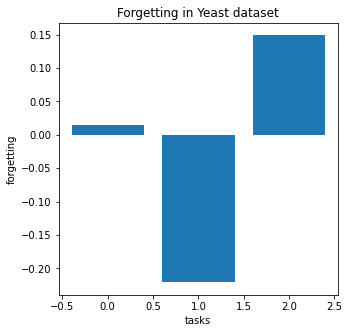

In [3]:
hparams_dict = {
    'inputs': 618,
    'outputs': 13,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-3,
    'sim_time': 600,
    'n_epochs': 100,
    'print_every': 10,
    'name': 'Yeast',
    'tasks': {'samples': None, 'labels': [7, 3, 3]},
    'seed': 5,
    'ckpt_dir': './checkpoints/yeast',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

Training and Evaluating on task 1
Train data shape is  (1500, 1, 618)
Train Labels shape is  (1500, 7)
Classes trained are: 0 to 7


  0%|          | 0/100 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 1
Class 1, class 1 neurons = 2, class 0 neurons = 1
Class 2, class 1 neurons = 2, class 0 neurons = 1
Class 3, class 1 neurons = 2, class 0 neurons = 1
Class 4, class 1 neurons = 2, class 0 neurons = 1
Class 5, class 1 neurons = 2, class 0 neurons = 1
Class 6, class 1 neurons = 2, class 0 neurons = 1


100%|██████████| 100/100 [19:43<00:00, 11.83s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 7) (917, 7)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.219349 |
| zero_one_loss       | 0.745911 |
| one_error           | 0        |
| micro av. jaccard   | 0.270088 |
| macro av. jaccard   | 0.196283 |
| micro av. precision | 0.650437 |
| macro av. precision | 0.517163 |
| micro av. recall    | 0.315949 |
| macro av. recall    | 0.231605 |
| micro av. f1        | 0.425306 |
| macro av. f1        | 0.301018 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 7) (917, 7)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.219349 |
| zero_one_loss       | 0.745911 |
| one_error           | 0        |
| micro av. jaccard   | 0.270088 |
| macro av. jaccard   | 0.196283 |
| micro av. precision | 0.650437 |
| macro av. precision | 0.517163 |


  0%|          | 0/100 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 2
Class 1, class 1 neurons = 5, class 0 neurons = 2
Class 2, class 1 neurons = 3, class 0 neurons = 2
Class 3, class 1 neurons = 5, class 0 neurons = 2
Class 4, class 1 neurons = 2, class 0 neurons = 1
Class 5, class 1 neurons = 2, class 0 neurons = 3
Class 6, class 1 neurons = 4, class 0 neurons = 2
Class 7, class 1 neurons = 2, class 0 neurons = 1
Class 8, class 1 neurons = 1, class 0 neurons = 2
Class 9, class 1 neurons = 1, class 0 neurons = 2


100%|██████████| 100/100 [31:24<00:00, 18.84s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 3) (917, 3)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.241003  |
| zero_one_loss       | 0.392585  |
| one_error           | 0.0785169 |
| micro av. jaccard   | 0.694188  |
| macro av. jaccard   | 0.637054  |
| micro av. precision | 0.746528  |
| macro av. precision | 0.742092  |
| micro av. recall    | 0.908268  |
| macro av. recall    | 0.828948  |
| micro av. f1        | 0.819494  |
| macro av. f1        | 0.76688   |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 10) (917, 10)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.228462 |
| zero_one_loss       | 0.832061 |
| one_error           | 0        |
| micro av. jaccard   | 0.4889   |
| macro av. jaccard   | 0.325393 |
| micro av. precision | 0.716482 |
| macro av. precisio

  0%|          | 0/100 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 3
Class 1, class 1 neurons = 8, class 0 neurons = 3
Class 2, class 1 neurons = 3, class 0 neurons = 4
Class 3, class 1 neurons = 10, class 0 neurons = 3
Class 4, class 1 neurons = 2, class 0 neurons = 1
Class 5, class 1 neurons = 3, class 0 neurons = 4
Class 6, class 1 neurons = 4, class 0 neurons = 4
Class 7, class 1 neurons = 3, class 0 neurons = 2
Class 8, class 1 neurons = 1, class 0 neurons = 2
Class 9, class 1 neurons = 1, class 0 neurons = 3
Class 10, class 1 neurons = 2, class 0 neurons = 1
Class 11, class 1 neurons = 3, class 0 neurons = 1
Class 12, class 1 neurons = 2, class 0 neurons = 1


100%|██████████| 100/100 [43:22<00:00, 26.02s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 3) (917, 3)
|                     |          0 |
|:--------------------|-----------:|
| hamming loss        | 0.14104    |
| zero_one_loss       | 0.367503   |
| one_error           | 0.00436205 |
| micro av. jaccard   | 0.304659   |
| macro av. jaccard   | 0.146805   |
| micro av. precision | 0.752212   |
| macro av. precision | 0.250737   |
| micro av. recall    | 0.338645   |
| macro av. recall    | 0.171717   |
| micro av. f1        | 0.467033   |
| macro av. f1        | 0.203837   |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 13) (917, 13)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.210133 |
| zero_one_loss       | 0.859324 |
| one_error           | 0        |
| micro av. jaccard   | 0.464171 |
| macro av. jaccard   | 0.283258 |
| micro av. precision | 0.714521 |
| macro

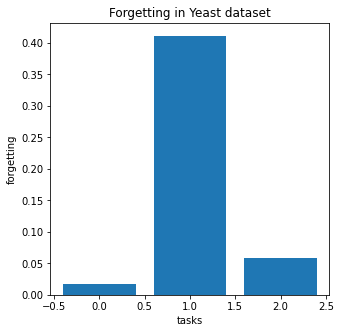

In [4]:
hparams_dict = {
    'inputs': 618,
    'outputs': 13,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-3,
    'sim_time': 600,
    'n_epochs': 100,
    'print_every': 10,
    'name': 'Yeast',
    'tasks': {'samples': None, 'labels': [7, 3, 3]},
    'seed': 3,
    'ckpt_dir': './checkpoints/yeast',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

Training and Evaluating on task 1
Train data shape is  (1500, 1, 618)
Train Labels shape is  (1500, 7)
Classes trained are: 0 to 7


  0%|          | 0/100 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 1
Class 1, class 1 neurons = 2, class 0 neurons = 1
Class 2, class 1 neurons = 1, class 0 neurons = 2
Class 3, class 1 neurons = 3, class 0 neurons = 1
Class 4, class 1 neurons = 2, class 0 neurons = 1
Class 5, class 1 neurons = 2, class 0 neurons = 1
Class 6, class 1 neurons = 2, class 0 neurons = 1


100%|██████████| 100/100 [19:47<00:00, 11.88s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 7) (917, 7)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.184297 |
| zero_one_loss       | 0.736096 |
| one_error           | 0        |
| micro av. jaccard   | 0.500844 |
| macro av. jaccard   | 0.299364 |
| micro av. precision | 0.741412 |
| macro av. precision | 0.498298 |
| micro av. recall    | 0.606851 |
| macro av. recall    | 0.365771 |
| micro av. f1        | 0.667416 |
| macro av. f1        | 0.401395 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 7) (917, 7)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.184297 |
| zero_one_loss       | 0.736096 |
| one_error           | 0        |
| micro av. jaccard   | 0.500844 |
| macro av. jaccard   | 0.299364 |
| micro av. precision | 0.741412 |
| macro av. precision | 0.498298 |


  0%|          | 0/100 [00:00<?, ?it/s]

Class 0, class 1 neurons = 5, class 0 neurons = 2
Class 1, class 1 neurons = 4, class 0 neurons = 2
Class 2, class 1 neurons = 1, class 0 neurons = 3
Class 3, class 1 neurons = 3, class 0 neurons = 1
Class 4, class 1 neurons = 3, class 0 neurons = 2
Class 5, class 1 neurons = 2, class 0 neurons = 1
Class 6, class 1 neurons = 4, class 0 neurons = 2
Class 7, class 1 neurons = 2, class 0 neurons = 1
Class 8, class 1 neurons = 1, class 0 neurons = 2
Class 9, class 1 neurons = 2, class 0 neurons = 1


100%|██████████| 100/100 [30:30<00:00, 18.31s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 3) (917, 3)
|                     |          0 |
|:--------------------|-----------:|
| hamming loss        | 0.189022   |
| zero_one_loss       | 0.436205   |
| one_error           | 0.00763359 |
| micro av. jaccard   | 0.61367    |
| macro av. jaccard   | 0.388448   |
| micro av. precision | 0.73553    |
| macro av. precision | 0.479127   |
| micro av. recall    | 0.787417   |
| macro av. recall    | 0.504742   |
| micro av. f1        | 0.760589   |
| macro av. f1        | 0.482424   |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 10) (917, 10)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.189313 |
| zero_one_loss       | 0.791712 |
| one_error           | 0        |
| micro av. jaccard   | 0.531823 |
| macro av. jaccard   | 0.315761 |
| micro av. precision | 0.737196 |
| macro

  0%|          | 0/100 [00:00<?, ?it/s]

Class 0, class 1 neurons = 8, class 0 neurons = 3
Class 1, class 1 neurons = 7, class 0 neurons = 3
Class 2, class 1 neurons = 2, class 0 neurons = 3
Class 3, class 1 neurons = 3, class 0 neurons = 1
Class 4, class 1 neurons = 3, class 0 neurons = 4
Class 5, class 1 neurons = 2, class 0 neurons = 1
Class 6, class 1 neurons = 7, class 0 neurons = 3
Class 7, class 1 neurons = 3, class 0 neurons = 2
Class 8, class 1 neurons = 1, class 0 neurons = 4
Class 9, class 1 neurons = 2, class 0 neurons = 1
Class 10, class 1 neurons = 2, class 0 neurons = 1
Class 11, class 1 neurons = 2, class 0 neurons = 1
Class 12, class 1 neurons = 2, class 0 neurons = 1


100%|██████████| 100/100 [42:48<00:00, 25.69s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 3) (917, 3)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.279535  |
| zero_one_loss       | 0.610687  |
| one_error           | 0.0283533 |
| micro av. jaccard   | 0.200624  |
| macro av. jaccard   | 0.165388  |
| micro av. precision | 0.548295  |
| macro av. precision | 0.54629   |
| micro av. recall    | 0.240349  |
| macro av. recall    | 0.202543  |
| micro av. f1        | 0.334199  |
| macro av. f1        | 0.272843  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(917, 13) (917, 13)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.211056 |
| zero_one_loss       | 0.861505 |
| one_error           | 0        |
| micro av. jaccard   | 0.462852 |
| macro av. jaccard   | 0.281242 |
| micro av. precision | 0.712221 |
| macro av. precisio

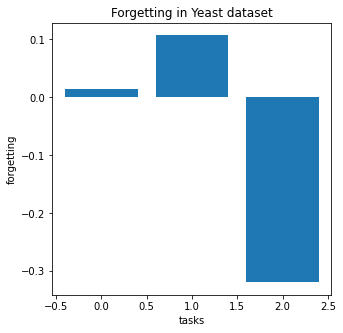

In [5]:
hparams_dict = {
    'inputs': 618,
    'outputs': 13,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-3,
    'sim_time': 600,
    'n_epochs': 100,
    'print_every': 10,
    'name': 'Yeast',
    'tasks': {'samples': None, 'labels': [7, 3, 3]},
    'seed': 4,
    'ckpt_dir': './checkpoints/yeast',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)